## Business Problem Understanding

**Context** 

Kita merupakan Data Scientist yang baru direkrut oleh perusahaan Hotel bintang 5. Tanggung jawab kita adalah untuk memprediksi kecenderungan pelanggan yang akan membatalkan pemesanan mereka di hotel kita atau tidak melalui fitur-fitur tertentu. Sebelum menunjuk kita sebagai Data Science, Hotel sering mengalami kerugian pendapatan karena pelanggan tiba-tiba membatalkan pemesanan kamar mereka sehingga kamar menjadi kosong dan tidak dapat ditempati oleh pelanggan lain.




**Problem Statement :**

Pembatalan dapat berdampak buruk pada hotel. Hilangnya pendapatan terjadi sebagai akibat dari kamar yang tidak terjual. No-show adalah pembatalan tanpa pemberitahuan. 

Ketika sebuah hotel dihadapkan dengan pembatalan menit terakhir dan kemudian check-in menit terakhir, hotel tidak bisa berbuat banyak selain menjual kamar dengan harga yang jauh lebih rendah, jadi peluang untuk mendapatkan revenue yang maksimal sangat minim.

Dan kemudian, ada juga biaya penggunaan layanan Online Travel Agent (OTA) untuk check-in menit terakhir. Hotel harus membayar biaya tertentu kepada OTA karena OTA bertindak sebagai perantara mereka, sehingga menurunkan keuntungan.

Tetapi jika hotel tidak bergantung pada OTA atau tidak memiliki unduhan otomatis pemesanan dan pembatalan, maka waktu pemesanan dan pembatalan tinggi, dan lebih banyak waktu berarti biaya lebih tinggi.

**Goals :**

Bagaimana kita dapat memprediksi dan meminimalkan pembatalan pemesanan kamar oleh pelanggan sehingga hotel bisa mendapatkan keuntungan yang maksimal dan pendapatan tambahan dari Makanan dan Minuman dari pelanggan yang menginap di hotel, serta meningkatkan demand agar kamar hotel dapat terisi semua.

**Analytic Approach :**

Kita akan menganalisis faktor apa saja yang mempengaruhi pembatalan pemesanan kamar hotel dan menentukan pola pelanggan yang akan membatalkan pemesanan atau tidak. 

Lalu kita akan coba untuk membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas pelanggan yang akan membatalkan pesanannya atau tidak


**Metric Evaluation**

1. True-Positive : Kita memperkirakan bahwa pelanggan akan membatalkan pemesanan mereka dan ternyata benar mereka membatalkan pemesanannya
Konsekuensi: Kita dapat memaksimalkan keuntungan kita dengan mengisi kamar kita sepenuhnya, serta mendapatkan keuntungan tambahan dari layanan F&B.

2. False-Negative : Kita memperkirakan bahwa pelanggan tidak akan membatalkan pemesanan mereka dan ternyata mereka membatalkan pemesanan mereka
Konsekuensi: Kamar yang dibatalkan pelanggan akan tetap kosong dan hotel akan kehilangan keuntungan di kamar ini, sementara sebenarnya kita dapat mengisinya dengan pelanggan lain.

3. False Positive : Kita memperkirakan bahwa pelanggan akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka
Konsekuensi: Kita akan kehilangan pelanggan, tetapi jika hotel kita demandnya tinggi seharusnya tidak ada beban pada profitabilitas hotel karena tidak ada kamar hotel yang kosong sebagai akibat dari kasus ini.

4. True-Negative : Kita memperkirakan bahwa pelanggan tidak akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka
Konsekuensi: Mayoritas karakteristik pelanggan yang memesan kamar hotel.

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| country | Text | Country of origin |
| market_segment | Text | Market segment designation, typically influences the price sensitivity |
| previous_cancellations  | Integer | Number of previous cancellations prior to current booking |
| booking_changes | Integer | Number of changes made to the booking since entering the hotel management system |
| deposit_type | Text | Type of deposit made for the reservation |
| days_in_waiting_list | Integer | Number of days booking was in the waiting list until it was confirmed |
| customer_type | Text | Type of booking |
| reserved_room_type  | Integer | Code of room type reserved |
| required_car_parking_spaces | Integer | Number of car parking spaces requested |
| total_of_special_requests | Integer | Number of special requests made by the customer |
| is_canceled | Integer | Value indicating if the booking was canceled (1) or not (0) |


# 1.Data Understanding

In [7]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [8]:
#Load Dataset
df = pd.read_csv("data_hotel_booking_demand.csv")
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [9]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [10]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[SEN, CMR]"
1,market_segment,object,0,0.00,8,"[Groups, Undefined]"
2,previous_cancellations,int64,0,0.00,15,"[2, 3]"
3,booking_changes,int64,0,0.00,19,"[9, 10]"
4,deposit_type,object,0,0.00,3,"[Refundable, No Deposit]"
5,days_in_waiting_list,int64,0,0.00,115,"[0, 176]"
6,customer_type,object,0,0.00,4,"[Transient, Contract]"
7,reserved_room_type,object,0,0.00,10,"[E, G]"
8,required_car_parking_spaces,int64,0,0.00,5,"[2, 8]"
9,total_of_special_requests,int64,0,0.00,6,"[3, 4]"


# 2. Data Cleaning

### 2.1 Handle Missing Value

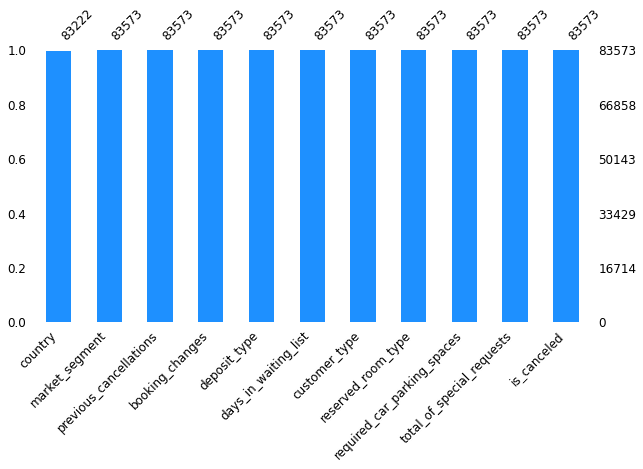

In [11]:
msno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Terdapat missing value sebanyak 351 di kolom Country , dimana banyak datanya sebesar 83.222 sedangkan kolom lain sebesar 83.573

<AxesSubplot:>

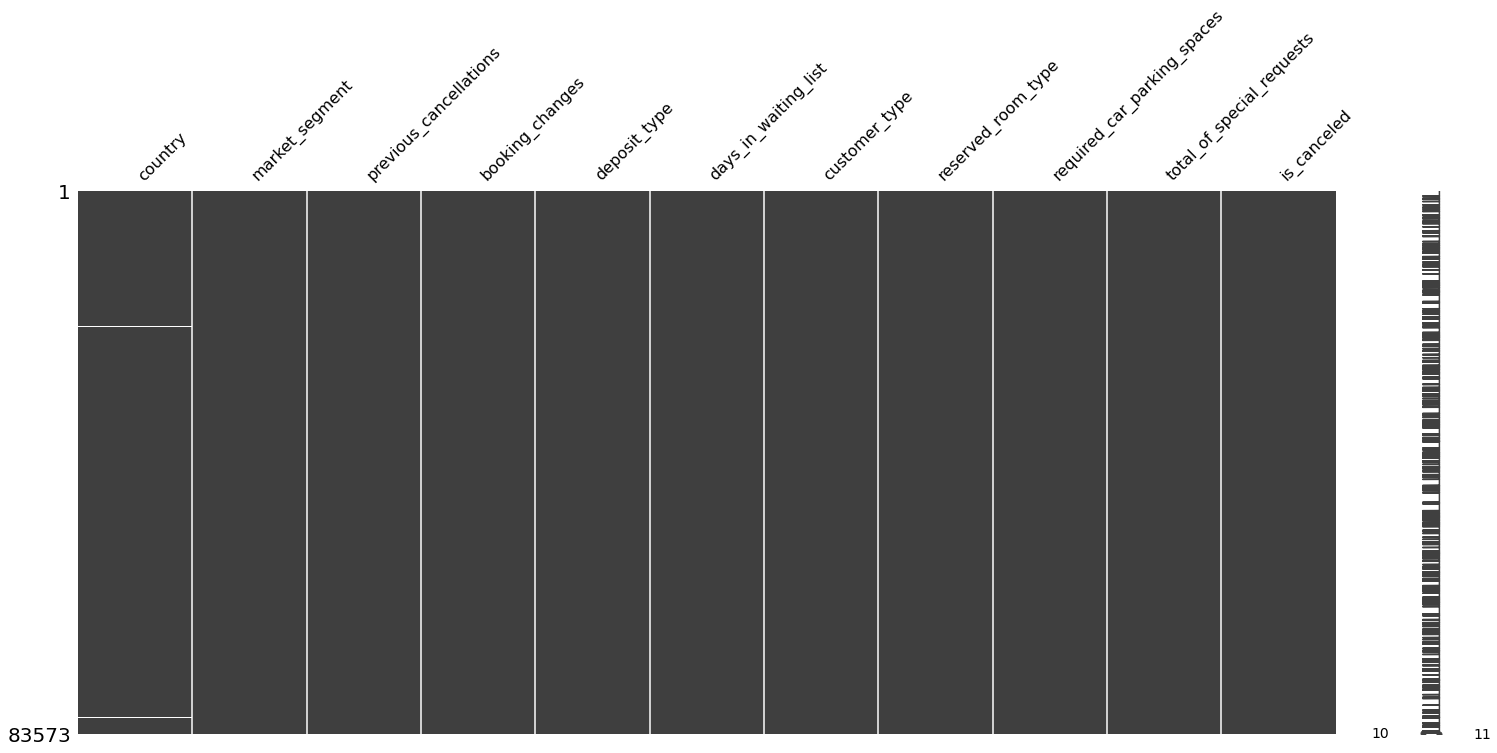

In [12]:
msno.matrix(df)

In [13]:
df['country'] = df['country'].fillna('Unknown')

In [14]:
df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

Data sudah tidak terdapat missing value lagi

### 2.2 Duplicate Data

In [15]:
# Check Duplicate Data
df.duplicated().any()

True

In [16]:
# Show duplicate data
duplicate = df[df.duplicated() == True]
duplicate

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


Terdapat 73.371 data duplikat dalam data, namun duplikat data ini tidak memiliki informasi unik(nama/nomor pelanggan atau tanggal) yang dapat membedakan satu data dengan data lainnya sehingga kita tidak memberikan perlakuan khusus untuk data duplikat ini

In [17]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,0,0.0,163,"[SGP, ARM]"
1,market_segment,object,0,0.0,8,"[Offline TA/TO, Undefined]"
2,previous_cancellations,int64,0,0.0,15,"[3, 13]"
3,booking_changes,int64,0,0.0,19,"[7, 8]"
4,deposit_type,object,0,0.0,3,"[Non Refund, No Deposit]"
5,days_in_waiting_list,int64,0,0.0,115,"[174, 62]"
6,customer_type,object,0,0.0,4,"[Contract, Transient]"
7,reserved_room_type,object,0,0.0,10,"[A, P]"
8,required_car_parking_spaces,int64,0,0.0,5,"[2, 8]"
9,total_of_special_requests,int64,0,0.0,6,"[5, 1]"


# 3.Data Analysis

Data kita sudah bersih dimana tidak ada missing value lagi. Sekarang kita bisa pakai data ini untuk keperluan pembuatan model machine learning

### 3.1 Check Imbalance Data

Kita akan melihat nilai dari kolom yang sudah kita targetkan (is_canceled) apakah terdapat perbedaan proporsi yang signifikan antar valuenya. Karena jika salah satu nilai di dalam kolom perbedaannya signifikan, akan dikategorikan sebagai imbalance data yang dimana akan berpengaruh terhadap Model kita nantinya

In [18]:
df['is_canceled'].value_counts()

0    52795
1    30778
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

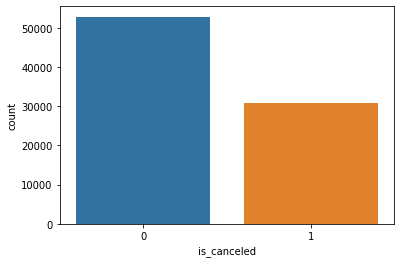

In [19]:
sns.countplot(df['is_canceled'])

In [20]:
(pd.crosstab(index=df['is_canceled'],columns='Proportion (%)',normalize=True)*100).round(2)

col_0,Proportion (%)
is_canceled,
0,63.17
1,36.83


Dari presentase di atas kita bisa memastikan bahwa data kita tidak Imbalance karena mayoritas data tidak diatas 70% 

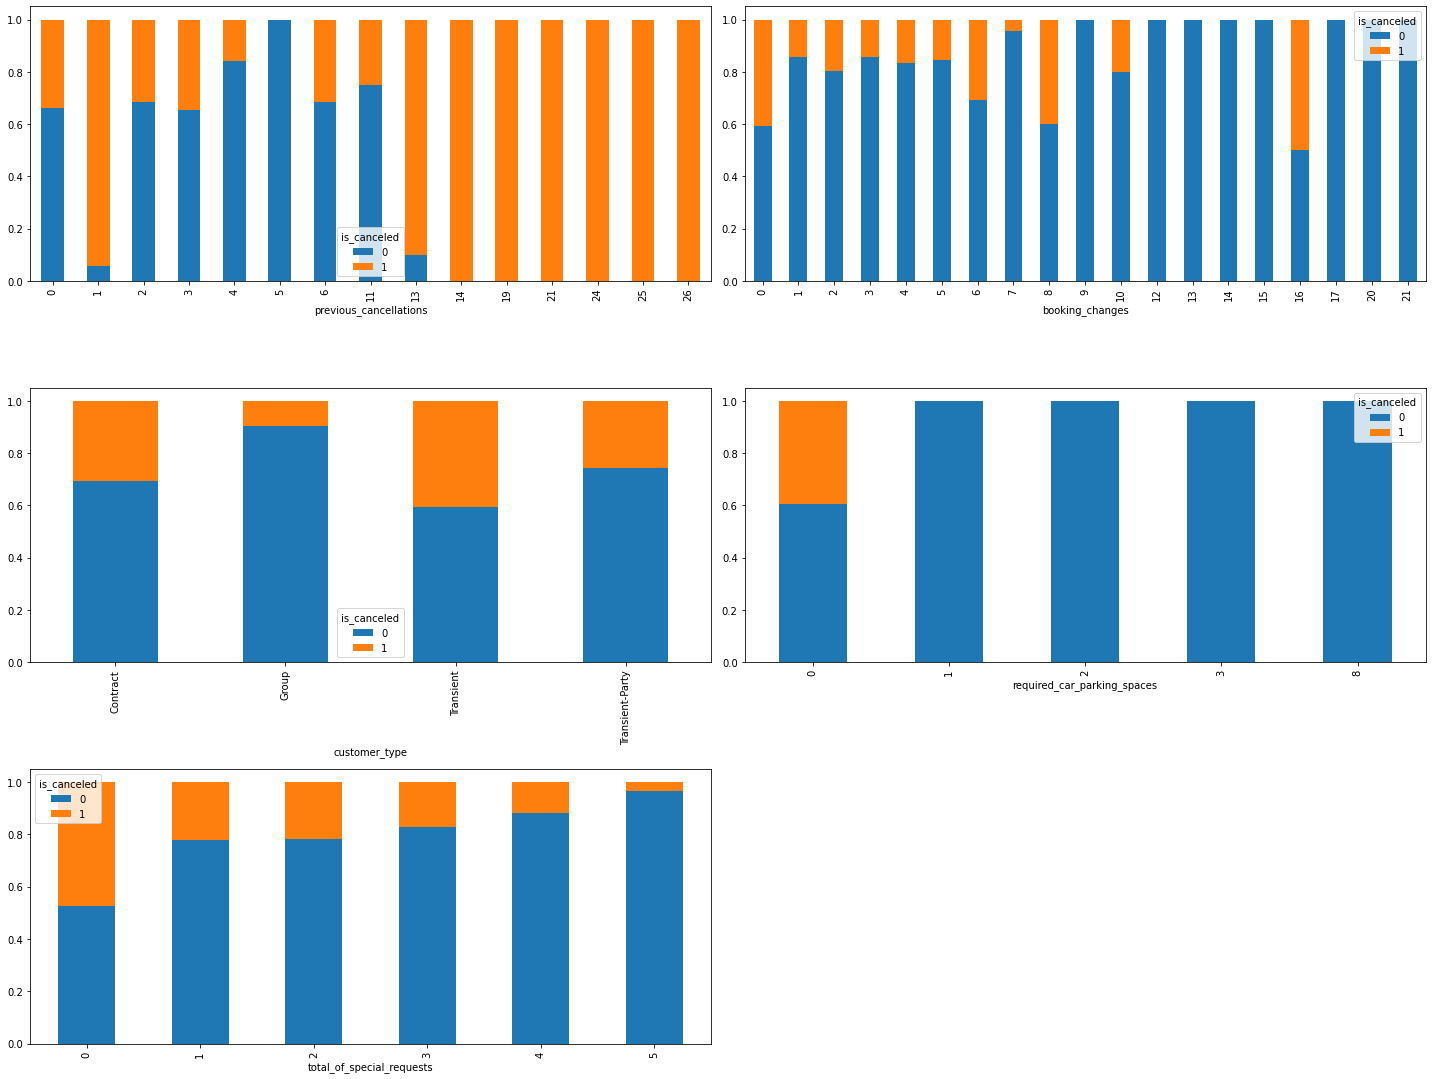

In [21]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['is_canceled','country','market_segment','deposit_type','reserved_room_type','days_in_waiting_list']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [22]:
for i in df.drop(columns=['is_canceled','country','market_segment','deposit_type','reserved_room_type','customer_type']).columns:
    impact_category = df.groupby(i)['is_canceled'].value_counts(normalize=True).unstack()
    display(impact_category.sort_values(by=[1.0], ascending=False))

is_canceled,0,1
previous_cancellations,,
14,NaN,1.000000
19,NaN,1.000000
21,NaN,1.000000
24,NaN,1.000000
25,NaN,1.000000
26,NaN,1.000000
1,0.056572,0.943428
13,0.100000,0.900000
3,0.652174,0.347826


is_canceled,0,1
booking_changes,,
16,0.500000,0.500000
0,0.593639,0.406361
8,0.600000,0.400000
6,0.692308,0.307692
10,0.800000,0.200000
2,0.802790,0.197210
4,0.834615,0.165385
5,0.844444,0.155556
3,0.856025,0.143975


is_canceled,0,1
days_in_waiting_list,,
391,NaN,1.0
71,NaN,1.0
79,NaN,1.0
26,NaN,1.0
76,NaN,1.0
...,...,...
121,1.0,NaN
150,1.0,NaN
185,1.0,NaN


is_canceled,0,1
required_car_parking_spaces,,
0,0.607153,0.392847
1,1.000000,NaN
2,1.000000,NaN
3,1.000000,NaN
8,1.000000,NaN


is_canceled,0,1
total_of_special_requests,,
0,0.524904,0.475096
1,0.780047,0.219953
2,0.784320,0.215680
3,0.827915,0.172085
4,0.881356,0.118644
5,0.967742,0.032258


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :
1. Customers yang sering melakukan cancellation booking sebelumnya (`previous_cancellation`) cenderung akan melakukan booking cancellation lagi kedepannya
2. Customers yang tidak melakukan cancellation booking ternyata mayoritas melakukan `booking_changes` sebelumnya. Semantara itu customer yang melakukan cancellation mayoritas yang jarang melakukan `booking_changes`
3. Untuk table `days_in_waiting_list`, kita tidak bisa menebak customer yang sudah menunggu dalam periode waktu yang singkat atau yang bahkan setahun lebih akan membatalkan pemesanan atau tidak. Namun kita bisa berasumsi bahwa cutsomer yang sudah menunggu lama tidak akan membatalkan pemesanan kamar karena mereka akan merasa waktunya terbuang sia-sia hanya untuk menunggu dan mereka bisa melewatkan kesempatan-kesempatan untuk memesan kamar yang lain sehingga customers akan rela menunggu dalam waktu yang lama sampai kamar yang mereka pesan bisa di tempati.
4. Pada table `required_car_parking_spaces`, customer yang request tempat parkir dalam pemesanan kamarnya tidak membatalkan transaksi pemesanan kamar mereka dan tidak ada pelanggan yang membatalkan pemesanan mereka meminta tempat parkir terhadap hotel tersebut.
5. Customer yang memiliki special request (`total_of_special_request`) lebih memilih untuk tidak membatalkan pemesanan kamar dibandingkan yang tidak memiliki special request

# 4.Data Preparation

In [23]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


### 4.1 Feature Column

#### 4.1.1 Country

In [24]:
(pd.crosstab(index=df['country'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
country,
PRT,40.80
GBR,10.16
FRA,8.74
ESP,7.17
DEU,6.12
ITA,3.18
IRL,2.80
BEL,1.97
BRA,1.86


Dari table di atas mayoritas pemesanan kamar hotel di pesan oleh customer yang berasal dari Portugal (PRT). Dikarenakan negara lain memiliki presentase yang kecil maka kita akan mengelompokan negara-negara tersebut ke dalam kategori 'Others'

In [25]:
def country(x):
    if x == 'PRT':
        return x
    else:
        return 'Others'

In [26]:
# Encoding Country Category using One Hot Encoding
df['country'] = df['country'].apply(country)
df2 = pd.get_dummies(df, columns=['country'])
df2.head()


,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0,1,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0,1,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0,0,1
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1,1,0
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0,0,1


#### 4.1.2 Market Segment

In [27]:
df['market_segment'].unique()

array(['Offline TA/TO', 'Online TA', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'], dtype=object)

In [28]:
(pd.crosstab(index=df['market_segment'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
market_segment,
Online TA,47.22
Offline TA/TO,20.37
Groups,16.42
Direct,10.65
Corporate,4.54
Complementary,0.61
Aviation,0.20
Undefined,0.00


Dari table di atas mayoritas pemesanan kamar hotel di pesan oleh customer melalui Online Travel Agent. Dikarenakan segment lain memiliki presentase yang kecil maka kita akan mengelompokan segment-segment tersebut ke dalam kategori 'Others'

In [29]:
def segment(x):
    if x == 'Online TA':
        return x
    else:
        return 'Others'

In [30]:
# Encoding Market_Segment Category using One Hot Encoding
df['market_segment'] = df['market_segment'].apply(segment)
df2 = pd.get_dummies(df, columns=['country','market_segment'])
df2.head()

,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others
0,0,0,No Deposit,0,Transient-Party,A,0,0,0,1,0,0,1
1,0,0,No Deposit,0,Transient,A,0,2,0,1,0,1,0
2,0,1,No Deposit,0,Transient,A,0,2,0,0,1,1,0
3,0,0,No Deposit,0,Transient,A,0,1,1,1,0,1,0
4,0,2,No Deposit,0,Transient,A,0,2,0,0,1,1,0


#### 4.1.3 Deposit Type

In [31]:
df['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

Karena kolom deposit type memiliki jumlah data unique yang sedikit kita akan langsung encoding kolom deposit type tanpa harus di kategorikan dahulu seperti kolom yang lain. 

In [32]:
df2 = pd.get_dummies(df, columns=['country','market_segment','deposit_type'])
df2.head()

,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,0,Transient-Party,A,0,0,0,1,0,0,1,1,0,0
1,0,0,0,Transient,A,0,2,0,1,0,1,0,1,0,0
2,0,1,0,Transient,A,0,2,0,0,1,1,0,1,0,0
3,0,0,0,Transient,A,0,1,1,1,0,1,0,1,0,0
4,0,2,0,Transient,A,0,2,0,0,1,1,0,1,0,0


#### 4.1.4 Customer Type

In [33]:
df['customer_type'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

Karena kolom customer type memiliki jumlah data unique yang sedikit kita akan langsung encoding kolom customer type tanpa harus di kategorikan dahulu seperti kolom yang lain. 

In [34]:
df2 = pd.get_dummies(df, columns=['country','market_segment','deposit_type','customer_type'])
df2.head()

,previous_cancellations,booking_changes,days_in_waiting_list,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,A,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1,0,0,0,A,0,2,0,1,0,1,0,1,0,0,0,0,1,0
2,0,1,0,A,0,2,0,0,1,1,0,1,0,0,0,0,1,0
3,0,0,0,A,0,1,1,1,0,1,0,1,0,0,0,0,1,0
4,0,2,0,A,0,2,0,0,1,1,0,1,0,0,0,0,1,0


#### 4.1.5 Reserved Room Type

In [35]:
df['reserved_room_type'].unique()

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

Pada dasarnya untuk setiap room di bagi menjadi beberapa kelas, mulai dari yang paling lengkap fasilitasnya sampai yang tidak lengkap. Namun pada kolom `reserved_room_type` setiap kelasnya tidak diberikan informasi apapun tentang fasilitas yang di dapat. Maka dari itu kita akan membagi menjadi dua kelas seperti pd kolom-kolom sebelumnya

In [36]:
(pd.crosstab(index=df['reserved_room_type'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
reserved_room_type,
A,71.84
D,16.18
E,5.56
F,2.44
G,1.73
B,0.94
C,0.81
H,0.48
P,0.01


Untuk kamar tipe A memiliki presentase yang paling besar di antara kamar tipe lain. Kita akan membagi menjadi dua kategori yaitu `reserved_room_type_A` dan `reserved_room_type_Others`

In [37]:
def room_type(x):
    if x == 'A':
        return x
    else:
        return 'Others'

In [38]:
df['reserved_room_type'] = df['reserved_room_type'].apply(room_type)
df2 = pd.get_dummies(df, columns=['country','market_segment','deposit_type','customer_type','reserved_room_type'])
df2.head()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0


#### 4.2 Domain Knowledge

1. Country : pelanggan di negara-negara tertentu memiliki kecenderungan yang lebih tinggi untuk membatalkan pemesanan mereka, sehubungan dengan proses visa untuk warga negara di negara tertentu ke negara tempat hotel berada.
2. Market Segment : Secara garis besar pelanggan yang memesan secara online lebih nyaman untuk membatalkan dan memesan ulang daripada pelanggan yang langsung datang ke hotel atau melalui kantor travel agent.
3. Deposit Type : pemesanan yang dilakukan dimana deposit dapat dikembalikan jika pemesanan dibatalkan, biasanya memiliki kecenderungan yang lebih tinggi untuk membatalkan pemesanan daripada pemesanan yang dilakukan dengan persyaratan deposit tidak dikembalikan.
4. Customer Type : pelanggan yang melakukan pemesanan untuk grup akan memiliki kecenderungan yang jauh lebih rendah untuk membatalkan pemesanan mereka karena perencanaan perjalanan untuk pelanggan yang bepergian dalam grup harus lebih pasti daripada tur individu.
5. Room Type : pelanggan yang memesan kamar lebih murah seharusnya memiliki kecenderungan yang lebih tinggi untuk membatalkan karena pelanggan di level ini akan mencari harga serendah mungkin, jadi jika ada potongan harga untuk kamar lain, mereka akan membatalkan pemesanan sebelumnya dan akan memesan kamar dengan harga yang sudah di diskon oleh pihak hotel.

In [39]:
df2.dtypes

previous_cancellations           int64
booking_changes                  int64
days_in_waiting_list             int64
required_car_parking_spaces      int64
total_of_special_requests        int64
is_canceled                      int64
country_Others                   uint8
country_PRT                      uint8
market_segment_Online TA         uint8
market_segment_Others            uint8
deposit_type_No Deposit          uint8
deposit_type_Non Refund          uint8
deposit_type_Refundable          uint8
customer_type_Contract           uint8
customer_type_Group              uint8
customer_type_Transient          uint8
customer_type_Transient-Party    uint8
reserved_room_type_A             uint8
reserved_room_type_Others        uint8
dtype: object

#### 4.3 Multicollinearity

Kita menggunakan Association sebagai metrik untuk menentukan tingkat korelasi antara fitur dan target karena Rasio Korelasi hanya cocok untuk kolom Kategori ke Numerik (semua kolom fitur kita adalah numerik, semua fitur kategori telah diencoding sebelumnya). Untuk Association, kita menggunakan Theil's U daripada Cramer's V karena Cramer's V memiliki kemungkinan untuk menghasilkan bias.

reference : https://medium.com/the-researchers-guide/generate-numerical-correlation-and-nominal-association-plots-using-python-c8548aa4a663



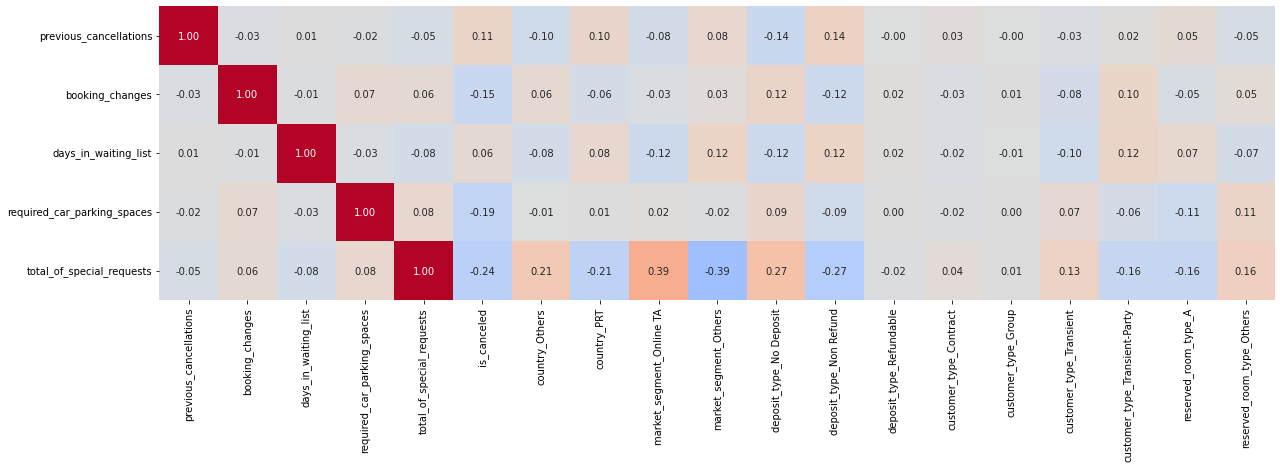

{'corr':                              previous_cancellations  booking_changes  \
 previous_cancellations                     1.000000        -0.027361   
 booking_changes                           -0.027361         1.000000   
 days_in_waiting_list                       0.006895        -0.010687   
 required_car_parking_spaces               -0.018208         0.068508   
 total_of_special_requests                 -0.048026         0.055748   
 
                              days_in_waiting_list  \
 previous_cancellations                   0.006895   
 booking_changes                         -0.010687   
 days_in_waiting_list                     1.000000   
 required_car_parking_spaces             -0.030333   
 total_of_special_requests               -0.083275   
 
                              required_car_parking_spaces  \
 previous_cancellations                         -0.018208   
 booking_changes                                 0.068508   
 days_in_waiting_list                      

In [40]:
import dython as dy
from dython.nominal import associations
associations(df2, figsize=(20,10), cbar=False,cmap='coolwarm', nom_nom_assoc='theil', display_rows=['previous_cancellations',
                                                                                    'booking_changes',
                                                                                    'days_in_waiting_list',
                                                                                    'required_car_parking_spaces',
                                                                                    'total_of_special_requests'])

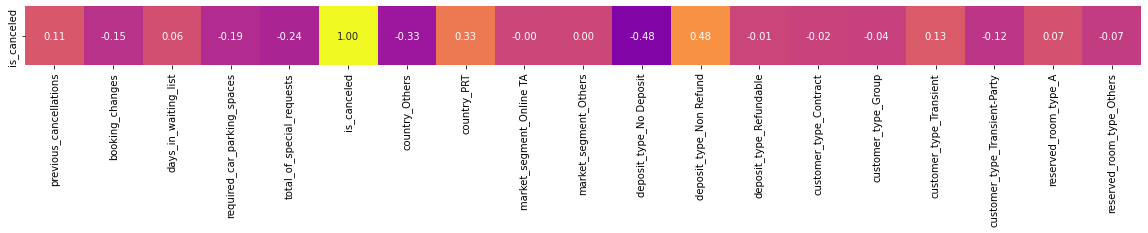

{'corr':              previous_cancellations  booking_changes  days_in_waiting_list  \
 is_canceled                0.109598        -0.145746              0.056203   
 
              required_car_parking_spaces  total_of_special_requests  \
 is_canceled                    -0.194807                  -0.235993   
 
              is_canceled  country_Others  country_PRT  \
 is_canceled          1.0       -0.333142     0.333142   
 
              market_segment_Online TA  market_segment_Others  \
 is_canceled                  -0.00493                0.00493   
 
              deposit_type_No Deposit  deposit_type_Non Refund  \
 is_canceled                -0.477539                 0.481102   
 
              deposit_type_Refundable  customer_type_Contract  \
 is_canceled                -0.011981               -0.023979   
 
              customer_type_Group  customer_type_Transient  \
 is_canceled            -0.040125                 0.129772   
 
              customer_type_Transient-Party 

In [41]:
associations(df2, figsize=(20,10),cmap='plasma', cbar=False, nom_nom_assoc='theil', display_rows=['is_canceled'])

Heatmap di atas menunjukkan bahwa tidak terdapat multicollinearity karena setiap fitur memiliki nilai yang berbeda

# 5. Modelling & Evaluation

#### 5.1 Splitting Data

In [42]:
x=df2.drop(columns='is_canceled') 
y=df2['is_canceled'] 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.80, random_state=42, stratify=y)


In [44]:
print(x_train.shape, x_test.shape)

(66858, 18) (16715, 18)


#### 5.2 Base Model Logistic Regression


Model - Cancellation Detection

    Class 0 - Tidak Cancel -> Negative
    Class 1 - Cancel -> Positive
    GOALS : Meminimalkan False-Negative (mendeteksi tidak adanya pembatalan namun kenyataannya ada pembatalan)

Model akan fokus terhadap Recall Class 1


Dalam kasus klasifikasi berikut ini kita akan menggunakan Logistic Regression untuk base modelnya

In [45]:
logreg = LogisticRegression()


In [46]:
logreg.fit(x_train, y_train)

LogisticRegression()

#### 5.2.1 Evaluation Metric LogisticRegression

In [47]:
## Evaluation Metric scoring for Model
def eval_metrics(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    predictions=Model.predict(x_train)
    accuracy=accuracy_score(y_train,predictions)
    recall=recall_score(y_train,predictions)
    precision=precision_score(y_train,predictions)
    f1=f1_score(y_train,predictions)

    y_pred_test=Model.predict(x_test)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    recall_test=recall_score(y_test,y_pred_test)
    precision_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data_logreg={
    Nama + ' Training':[accuracy,recall,precision,f1],
    Nama + ' Testing':[accuracy_test,recall_test,precision_test,f1_test]
}

    df_logreg=(pd.DataFrame(data_logreg,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    report_train=classification_report(y_train,predictions)
    cm_train=confusion_matrix(y_train,predictions,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    report_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df_logreg,report_train,df_train,report_test,df_test

## Run Function
df_logreg, report_logreg_tr, cm_logreg_tr, report_logreg_ts, cm_logreg_ts = eval_metrics(logreg,x_train,x_test,y_train,y_test,'LogReg Base')

In [48]:
df_logreg

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.7775,0.5379,0.7912,0.6404
LogReg Base Testing,0.7737,0.5257,0.7897,0.6312


In [49]:
print(report_logreg_tr, report_logreg_ts)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     42236
           1       0.79      0.54      0.64     24622

    accuracy                           0.78     66858
   macro avg       0.78      0.73      0.74     66858
weighted avg       0.78      0.78      0.77     66858
               precision    recall  f1-score   support

           0       0.77      0.92      0.84     10559
           1       0.79      0.53      0.63      6156

    accuracy                           0.77     16715
   macro avg       0.78      0.72      0.73     16715
weighted avg       0.78      0.77      0.76     16715



Pada base model di atas, kita mendapatkan score Recall positif sebesar 0.54 dimana nilai tersebut masih belum ideal. Perlu dilakukan Feature Engineering atau pun Tuning.

In [50]:
# confusion matrix test
cm_logreg_ts

,Pred 1,Pred 0
Akt 1,3236,2920
Akt 0,862,9697


False Negative yang kita dapat masih tinggi dan hampir mendekati True Positive nya. Kita perlu mengembangkan lagi model ini atau mencoba algoritma yang berbeda yang menghasilkan False Negative lebih rendah.

#### 5.3 Base Model K-Nearest Neighbors (KNN)

Teknik ini memberikan hasil prediksi berdasarkan kelas mayoritas dari beberapa pengamatan serupa atau 'tetangga' terdekat. Meskipun cukup sederhana dan tidak menghasilkan Model, KNN dapat memberikan akurasi yang memadai dibandingkan dengan metode lain, kelemahannya adalah KNN tidak cukup praktis di sebagian besar kasus dan membutuhkan memori yang besar. KNN bersifat non parametrik, artinya tidak menghasilkan persamaan seperti Linear Regression atau Logistic Regression.



In [51]:
KNN = KNeighborsClassifier()

In [52]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

##### 5.3.1 Evaluation Metric KNN

In [53]:
df_KNN, report_KNN_tr, cm_KNN_tr, report_KNN_ts, cm_KNN_ts = eval_metrics(KNN,x_train,x_test,y_train,y_test,'KNN Base')

In [54]:
df_KNN

,Accuracy,Recall,Precision,F1
KNN Base Training,0.7853,0.7156,0.7055,0.7105
KNN Base Testing,0.7811,0.7078,0.7008,0.7043


In [55]:
print(report_KNN_tr, report_KNN_ts)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     42236
           1       0.71      0.72      0.71     24622

    accuracy                           0.79     66858
   macro avg       0.77      0.77      0.77     66858
weighted avg       0.79      0.79      0.79     66858
               precision    recall  f1-score   support

           0       0.83      0.82      0.83     10559
           1       0.70      0.71      0.70      6156

    accuracy                           0.78     16715
   macro avg       0.76      0.77      0.77     16715
weighted avg       0.78      0.78      0.78     16715



Pada base model di atas, kita mendapatkan score Recall positif diatas 0.7 dimana nilai tersebut sudah cukup ideal.Perlu di improve lagi agar kita bisa mendapatkan hasil Recall lebih baik lagi.

In [56]:
cm_KNN_ts

,Pred 1,Pred 0
Akt 1,4357,1799
Akt 0,1860,8699


Dapat kita lihat bahwa False Negative nya lebih kecil daripada True Positive. Kita akan mengembangkan lagi Model ini agar dapat menghasilkan False Negative yang lebih kecil lagi.

#### 5.3 Base Model Support Vector Machine (SVM)

SVM adalah salah satu metode prediksi yang paling kuat. Setelah memberikan set model SVM dari data pelatihan berlabel untuk setiap kategori, mereka dapat mengkategorikan teks baru. Manfaat menggunakan SVM adalah kecepatan yang lebih tinggi dan kinerja yang lebih baik dalam jumlah data yang rendah/terbatas.

Tujuan dari algoritma SVM adalah untuk membuat garis atau batas keputusan terbaik yang dapat memisahkan ruang n-dimensi ke dalam kelas-kelas sehingga kita dapat dengan mudah menempatkan titik data baru dalam kategori yang benar di masa depan. Batas keputusan terbaik ini disebut hyperplane. SVM memilih titik/vektor ekstrim yang membantu dalam menciptakan hyperplane. Kasus ekstrim ini disebut sebagai support vector, dan karenanya algoritma disebut sebagai Support Vector Machine.



In [57]:
from sklearn.svm import SVC

In [58]:
SVM = SVC()

In [59]:
SVM.fit(x_train, y_train)

SVC()

##### 5.3.1 Evaluation Metric SVM

In [60]:
df_SVM, report_SVM_tr, cm_SVM_tr, report_SVM_ts, cm_SVM_ts = eval_metrics(SVM,x_train,x_test,y_train,y_test,'Support Vector Machine Base')

In [61]:
df_SVM

,Accuracy,Recall,Precision,F1
Support Vector Machine Base Training,0.7656,0.3787,0.9612,0.5434
Support Vector Machine Base Testing,0.7657,0.3801,0.9590,0.5444


In [62]:
print(report_SVM_tr, report_SVM_ts)

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     42236
           1       0.96      0.38      0.54     24622

    accuracy                           0.77     66858
   macro avg       0.85      0.68      0.69     66858
weighted avg       0.82      0.77      0.73     66858
               precision    recall  f1-score   support

           0       0.73      0.99      0.84     10559
           1       0.96      0.38      0.54      6156

    accuracy                           0.77     16715
   macro avg       0.85      0.69      0.69     16715
weighted avg       0.82      0.77      0.73     16715



Score Recall positif yang kita dapatkan di bawah 0.4 dimana socre ini tidaklah ideal. Hal ini mengakibatkan Model tidak dapat membedakan nilai-nilai tersebut (Cancel dan Tidak Cancel) secara tepat. Oleh karena itu, data ini perlu dilakukan Feature Engineering, Tuning atau membangun algoritma Machine Learning lainnya.

 

In [63]:
cm_SVM_ts

,Pred 1,Pred 0
Akt 1,2340,3816
Akt 0,100,10459


Jumlah False Negative masih melebihi dari jumlah True Positive dimana Model ini tidak berpotensial

#### 5.4 Base Model Decision Tree

Pohon Keputusan merupakan hierarki pertanyaan yang mengarah pada keputusan. Sama halnya dengan KNN, Decision Tree bersifat non-parametrik dan digunakan untuk menjawab permasalahan yang sulit diselesaikan dengan model parametrik. Dengan metode ini, kita tidak perlu membuat asumsi yang kuat tentang bentuk model, dan juga lebih fleksibel untuk menangkap semua jenis hubungan (linear atau non-linear). Decision Tree juga menghasilkan hasil yang lebih cepat dari KNN, fleksibel dan memiliki interpretability yang tinggi.



In [64]:
dt= DecisionTreeClassifier()

In [65]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

##### 5.4.1 Evaluation Metric Decision Tree

In [66]:
df_dt, report_dt_tr, cm_dt_tr, report_dt_ts, cm_dt_ts = eval_metrics(dt,x_train,x_test,y_train,y_test,'Decision Tree Base')

In [67]:
df_dt

,Accuracy,Recall,Precision,F1
Decision Tree Base Training,0.8100,0.7093,0.7591,0.7334
Decision Tree Base Testing,0.8054,0.6964,0.7560,0.7250


In [68]:
print(report_dt_tr, report_dt_ts)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     42236
           1       0.76      0.71      0.73     24622

    accuracy                           0.81     66858
   macro avg       0.80      0.79      0.79     66858
weighted avg       0.81      0.81      0.81     66858
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.72      6156

    accuracy                           0.81     16715
   macro avg       0.79      0.78      0.79     16715
weighted avg       0.80      0.81      0.80     16715



Skor Recall positif  dalam set train dan Base Model adalah sekitar 0,7 (baik tetapi tidak terlalu ideal), dan selain itu Model ini menunjukkan stabilitas yang baik. Skor ini menunjukkan potensi yang baik untuk model ini karena diproduksi oleh Base Model tanpa hyperparameter tuning. Selanjutnya kebutuhan Base Model ini akan dilakukan Tuning dan diharapkan dapat mencapai skor Recall(+) sebesar 0.80 pada akhir tuning.



In [69]:
cm_dt_ts

,Pred 1,Pred 0
Akt 1,4287,1869
Akt 0,1384,9175


Jumlah False Negative setengah di bawah jumlah True Positif oleh karena itu kita perlu memperbaiki Model ini atau mencoba dengan Algoritma yang berbeda yang menghasilkan kasus False-Negative secara signifikan lebih rendah daripada Base Model.

#### 5.5 Base Model Random Forest

Random Forest adalah metode pembelajaran ensemble untuk klasifikasi, regresi dan tugas-tugas lain yang beroperasi dengan membangun banyak pohon keputusan pada waktu pelatihan. Untuk tugas klasifikasi, output dari hutan acak adalah kelas yang dipilih oleh sebagian besar pohon. Random decision Forest cocok untuk training set yang mengalami overfitting. Random Forest umumnya lebih baik dari pohon keputusan, tetapi akurasinya lebih rendah daripada gradient boost trees. Namun, karakteristik data dapat memengaruhi kinerjanya.


In [70]:
rf = RandomForestClassifier()

In [71]:
rf.fit(x_train, y_train)

RandomForestClassifier()

##### 5.5.1 Evaluation Metric Random Forest

In [72]:
df_rf, report_rf_tr, cm_rf_tr, report_rf_ts, cm_rf_ts = eval_metrics(rf,x_train,x_test,y_train,y_test,'Random Forest Base')

In [73]:
df_rf

,Accuracy,Recall,Precision,F1
Random Forest Base Training,0.8100,0.7103,0.7585,0.7336
Random Forest Base Testing,0.8061,0.6985,0.7564,0.7263


In [74]:
print(report_rf_tr, report_rf_ts)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     42236
           1       0.76      0.71      0.73     24622

    accuracy                           0.81     66858
   macro avg       0.80      0.79      0.79     66858
weighted avg       0.81      0.81      0.81     66858
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.79      0.78      0.79     16715
weighted avg       0.80      0.81      0.80     16715



Skor Recall positif  dalam set train dan Base Model adalah sekitar 0,7 (baik tetapi tidak terlalu ideal), dan selain itu Model ini menunjukkan stabilitas yang baik. Skor ini menunjukkan potensi yang baik untuk model ini karena diproduksi oleh Base Model tanpa hyperparameter tuning. Selanjutnya kebutuhan Base Model ini akan dilakukan Tuning dan diharapkan dapat mencapai skor Recall(+) sebesar 0.80 pada akhir tuning.



In [75]:
cm_rf_ts

,Pred 1,Pred 0
Akt 1,4300,1856
Akt 0,1385,9174


Jumlah False Negative setengah di bawah jumlah True Positif oleh karena itu kita perlu memperbaiki Model ini atau mencoba dengan Algoritma yang berbeda yang menghasilkan kasus False-Negative secara signifikan lebih rendah daripada Base Model.

#### 5.5.2 Evaluation Metric All Base Model

In [76]:
pd.concat([df_logreg, df_KNN, df_SVM, df_dt, df_rf])

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.7775,0.5379,0.7912,0.6404
LogReg Base Testing,0.7737,0.5257,0.7897,0.6312
KNN Base Training,0.7853,0.7156,0.7055,0.7105
KNN Base Testing,0.7811,0.7078,0.7008,0.7043
Support Vector Machine Base Training,0.7656,0.3787,0.9612,0.5434
Support Vector Machine Base Testing,0.7657,0.3801,0.9590,0.5444
Decision Tree Base Training,0.8100,0.7093,0.7591,0.7334
Decision Tree Base Testing,0.8054,0.6964,0.7560,0.7250
Random Forest Base Training,0.8100,0.7103,0.7585,0.7336
Random Forest Base Testing,0.8061,0.6985,0.7564,0.7263


Model yang memilik potensial berdasarkan recall scorenya diantaranya adalah :
- KNN (0.71)
- Decision Tree (0.70)
- Random Forest (0.71)

#### 5.7 All Confusion Matrix

In [77]:
print('Confusion Matrix - Testing using LogReg Base')
print(cm_logreg_ts)
print('='*50)

print('Confusion Matrix - Testing using KNN Base')
print(cm_KNN_ts)
print('='*50)

print('Confusion Matrix - Testing using SVM Base')
print(cm_SVM_ts)
print('='*50)

print('Confusion Matrix - Testing using Decision Tree Base')
print(cm_dt_ts)
print('='*50)

print('Confusion Matrix - Testing using Random Forest Base')
print(cm_rf_ts)

Confusion Matrix - Testing using LogReg Base
       Pred 1  Pred 0
Akt 1    3236    2920
Akt 0     862    9697
Confusion Matrix - Testing using KNN Base
       Pred 1  Pred 0
Akt 1    4357    1799
Akt 0    1860    8699
Confusion Matrix - Testing using SVM Base
       Pred 1  Pred 0
Akt 1    2340    3816
Akt 0     100   10459
Confusion Matrix - Testing using Decision Tree Base
       Pred 1  Pred 0
Akt 1    4287    1869
Akt 0    1384    9175
Confusion Matrix - Testing using Random Forest Base
       Pred 1  Pred 0
Akt 1    4300    1856
Akt 0    1385    9174


Dari semua model diatas, yang paling berpotensial berdasarkan jumlah False Negativenya di antaranya adalah:
- KNN (1.799)
- Decision Tree (1.869)
- Random Forest(1.856)

3 Model di atas akan kita lakukan tuning menggunakan Cross Validation

#### 5.6 Benchmarking Using Cross Validation

Benchmarking adalah perbandingan komprehensif antara beberapa algoritma pembelajaran mesin (ML) yang terdiri dari cross validation menyeluruh dari kinerja prediktifnya. Cross Validation sendiri merupakan teknik untuk mengukur kinerja suatu model melalui resampling. Merupakan praktik standar dalam Machine Learning untuk membagi set data menjadi training set dan testing set. Training set digunakan untuk melatih model, sedangkan testing set digunakan untuk mengevaluasi model performance. Cross Validation memperluas proses ini dengan berulang kali membagi set data menjadi training dan testing set yang berbeda untuk memastikan bahwa semua pengamatan muncul di training dan testing set. Oleh karena itu evaluation metric dapat lebih dipercaya.



In [78]:
## Create function mean of Cross-Validation score
def cross_val(model,x,y,Nama):
    skf = StratifiedKFold(n_splits=5)
    cv_accuracy = cross_val_score(model, x, y, cv = skf, scoring='accuracy')
    cv_recall = cross_val_score(model, x, y, cv = skf, scoring='recall')
    cv_precision = cross_val_score(model, x, y, cv = skf, scoring='precision')
    cv_f1 = cross_val_score(model, x, y, cv = skf, scoring='f1')
    data={
        Nama + ' Cross-Validation (Mean)':[cv_accuracy.mean(),cv_recall.mean(),cv_precision.mean(),cv_f1.mean()],
        Nama + ' Cross-Validation (Standard Deviation)':[cv_accuracy.std(),cv_recall.std(),cv_precision.std(),cv_f1.std()]
    }
    ## Create DataFrame
    df = pd.DataFrame(data,index=['Accuracy','Recall','Precision','F-1 Score']).T

    return df

##### 5.6.1 Cross Validation Logistic Regression

In [79]:
cv_logreg = cross_val(LogisticRegression(), x_train, y_train,'LogReg Base').round(2)
cv_logreg

,Accuracy,Recall,Precision,F-1 Score
LogReg Base Cross-Validation (Mean),0.78,0.54,0.79,0.64
LogReg Base Cross-Validation (Standard Deviation),0.01,0.01,0.01,0.01


##### 5.6.2 Cross Validation KNN

In [80]:
cv_KNN = cross_val(KNeighborsClassifier(), x_train, y_train,'KNN Base').round(2)
cv_KNN

,Accuracy,Recall,Precision,F-1 Score
KNN Base Cross-Validation (Mean),0.77,0.65,0.71,0.67
KNN Base Cross-Validation (Standard Deviation),0.01,0.06,0.05,0.02


##### 5.6.3 Cross Validation SVM

In [81]:
cv_SVM = cross_val(SVC(), x_train, y_train,'SVM Base').round(2)
cv_SVM

,Accuracy,Recall,Precision,F-1 Score
SVM Base Cross-Validation (Mean),0.77,0.38,0.96,0.54
SVM Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


##### 5.6.4 Cross Validation Decision Tree

In [82]:
cv_dt = cross_val(DecisionTreeClassifier(), x_train, y_train,'Decision Tree Base').round(2)
cv_dt

,Accuracy,Recall,Precision,F-1 Score
Decision Tree Base Cross-Validation (Mean),0.81,0.70,0.76,0.73
Decision Tree Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


##### 5.6.5 Cross Validation Random Forest

In [83]:
cv_rf = cross_val(RandomForestClassifier(), x_train, y_train,'Random Forest Base').round(2)
cv_rf

,Accuracy,Recall,Precision,F-1 Score
Random Forest Base Cross-Validation (Mean),0.81,0.71,0.76,0.73
Random Forest Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


##### 5.6.6 Summary

In [84]:
pd.concat([cv_logreg, cv_KNN, cv_SVM, cv_dt, cv_rf])

,Accuracy,Recall,Precision,F-1 Score
LogReg Base Cross-Validation (Mean),0.78,0.54,0.79,0.64
LogReg Base Cross-Validation (Standard Deviation),0.01,0.01,0.01,0.01
KNN Base Cross-Validation (Mean),0.77,0.65,0.71,0.67
KNN Base Cross-Validation (Standard Deviation),0.01,0.06,0.05,0.02
SVM Base Cross-Validation (Mean),0.77,0.38,0.96,0.54
SVM Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01
Decision Tree Base Cross-Validation (Mean),0.81,0.70,0.76,0.73
Decision Tree Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01
Random Forest Base Cross-Validation (Mean),0.81,0.71,0.76,0.73
Random Forest Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


Dari semua model yang Mean scorenya mendekati ideal diantaranya adalah :
- KNN (0.65)
- Decision Tree (0.70)
- Random Forest (0.71)

In [85]:
df2.to_csv('Hotel_Data_Clean2.csv')

In [86]:
df3=pd.read_csv('Hotel_Data_Clean2.csv', index_col=0)
df3.head()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0


#### 5.7 Hyperparameter Tuning

reference : 
- https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
- https://www.datasklr.com/select-classification-methods/k-nearest-neighbors

In [87]:
x=df3.drop(columns='is_canceled') 
y=df3['is_canceled'] 

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.80, random_state=42, stratify=y)

In [89]:
print(x_train.shape, x_test.shape)

(66858, 18) (16715, 18)


##### 5.7.1 Hyperparameter tuning K-Nearest Neighbors

In [90]:
KNN_tuned = KNeighborsClassifier()


In [91]:
KNN_tuned.fit(x_train, y_train)

KNeighborsClassifier()

Dalam algoritma KNN, ada beberapa parameter yang akan diatur. Dibutuhkan titik, menemukan titik K-terdekat, dan memprediksi label untuk titik itu.

1. Yang pertama adalah jumlah K (contoh) yang paling dekat dengan query. Memilih K yang tepat untuk data kita dilakukan dengan mencoba beberapa K dan memilih salah satu yang paling sesuai. Oleh karena itu, memilih rentang nilai K adalah praktik terbaik daripada mencoba angka yang berbeda secara manual sebagai K.
2. Weights
    - Uniform : algoritma akan mengklasifikasikan nilai berdasarkan jumlah total nilai yang sama pada titik-titik data. Jumlah terbesar dari nilai serupa dalam kedekatan, prediksi akan dibuat untuk nilai itu.
    - Distance : algoritma yang memberikan bobot jarak dari suatu nilai ke nilai yang mirip pada jarak tersebut. Semakin dekat nilai yang mirip dengan nilai sebenarnya, algoritma akan memberikan bobot lebih pada koneksi. Oleh karena itu, jumlah total nilai yang mirip dalam kedekatan tidak selalu diterjemahkan ke dalam kelas prediksi, melainkan seberapa dekat mereka dengan nilai prediksi.
3. Power Parameter
    - p=1 : manhattan_distance (l1)
    - p=2 : euliddean_distance(l2)
    - arbitrer p : jarak minkowski (l_p)



In [92]:
parameter_KNN={
    'n_neighbors':range(1,50,1), ## 1, 2, up to 49
    'weights':['uniform', 'distance'],
    'p':[1, 2]
}

In [93]:
print('Number of Neighbors:',len(range(1,50,1)))
print('Weights:', len(['uniform', 'distance']))
print('Power Parameters:', len([1,2]))

Number of Neighbors: 49
Weights: 2
Power Parameters: 2


In [94]:
print(' Kombinasi fitur jika dilipatgandakan 3 kali:', 49 * 2 * 2 * 3)

 Kombinasi fitur jika dilipatgandakan 3 kali: 588


In [95]:
KNN_Grid = GridSearchCV( KNN,
                        parameter_KNN,
                        cv = StratifiedKFold(n_splits=3),
                        n_jobs = 3,
                        verbose = 1, 
                        scoring = 'recall')
KNN_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 196 candidates, totalling 588 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=3,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [96]:
KNN_Grid.best_score_

0.848425616755471

In [97]:
KNN_Grid.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [98]:
KNN_Tuned_Grid = KNN_Grid.best_estimator_

#### 5.7.2 Evaluation metric KNN after Tuning 

In [99]:
def Eval_Metric(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data = {
    Nama + ' Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + ' Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df=(pd.DataFrame(data,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train,y_pred_train)
    cm_train=confusion_matrix(y_train,y_pred_train,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    cr_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df,cr_train,df_train,cr_test,df_test

In [100]:
df_KNN_Tuned_GS, cr_KNN_Tuned_GS_tr, cm_KNN_Tuned_GS_tr, cr_KNN_Tuned_GS_ts, cm_KNN_Tuned_GS_ts = Eval_Metric( KNN_Tuned_Grid, 
                                                                                                        x_train, x_test, 
                                                                                                        y_train, y_test,
                                                                                                        'KNN Tuned')

In [101]:
df_KNN_Tuned_GS

,Accuracy,Recall,Precision,F1
KNN Tuned Training,0.737,0.8205,0.6055,0.6968
KNN Tuned Testing,0.736,0.8117,0.6057,0.6937


Setelah di lakukan tuning, score dari Recall mengalami kenaikan menjadi sekitar 0.8. Kenaikan tersebut kita bisa sudah cukup ideal untuk Model 

In [102]:
print(cr_KNN_Tuned_GS_tr, cr_KNN_Tuned_GS_ts)

              precision    recall  f1-score   support

           0       0.87      0.69      0.77     42236
           1       0.61      0.82      0.70     24622

    accuracy                           0.74     66858
   macro avg       0.74      0.75      0.73     66858
weighted avg       0.77      0.74      0.74     66858
               precision    recall  f1-score   support

           0       0.86      0.69      0.77     10559
           1       0.61      0.81      0.69      6156

    accuracy                           0.74     16715
   macro avg       0.73      0.75      0.73     16715
weighted avg       0.77      0.74      0.74     16715



In [103]:
## Show Confusion Matrix - Testing
cm_KNN_Tuned_GS_ts

,Pred 1,Pred 0
Akt 1,4997,1159
Akt 0,3253,7306


#### 5.7.3 Hyperparameter tuning Decision Tree

In [104]:
DT = DecisionTreeClassifier()

In [105]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

Beberapa parameter dalam Decision Tree:
1. max_depth : Ini menunjukkan seberapa dalam tree itu. Semakin dalam tree, semakin banyak pemisahan dan menangkap lebih banyak informasi tentang data.
2. min_samples_split : mewakili jumlah minimum sampel yang diperlukan untuk membagi node internal. Ini dapat bervariasi antara mempertimbangkan setidaknya satu sampel di setiap node hingga mempertimbangkan semua sampel di setiap node. Ketika kita meningkatkan parameter ini, tree menjadi lebih dibatasi karena harus mempertimbangkan lebih banyak sampel di setiap node
3. min_sample_leaf : Jumlah minimum sampel yang diperlukan untuk berada pada node leaf. Parameter ini mirip dengan min_samples_splits, namun, parameter ini menggambarkan jumlah sampel minimum pada leaf, pangkal tree.
4. max_features : Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik

reference : https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [106]:
parameter_DT = {
    'max_depth' : np.arange(1, 20), ## 19 values
    'min_samples_split' : np.arange(2, 20), ## 18 values
    'min_samples_leaf' : np.arange(1, 20), ## 19 values
    'max_features' : np.arange(0.1, 1, 0.1) 
}

In [107]:
print('Max Depth:', len(np.arange(1,20)))
print('Min Samples Split:', len(np.arange(2,20)))
print('Min Samples Leaf:', len(np.arange(1,20)))
print('Max Features:', len(np.arange(0.1, 1, 0.1)))

Max Depth: 19
Min Samples Split: 18
Min Samples Leaf: 19
Max Features: 9


In [108]:
print(' Jika fitur di kalikan 3 kali, maka kombinasinya adalah:', 19 * 18 * 19 * 9 * 3)

 Jika fitur di kalikan 3 kali, maka kombinasinya adalah: 175446


Dikarenakan kombinasi data yang sangat banyak, kita akan menggunakan Randomized Search. Komputasi menggunakan GridSearch sangat berat terhadap processor komputer kita karena setiap kombinasi harus di lakukan tes. Namun kekurangan dari Randomized Search ini adalah score yang kita dapat blm tentu selalu baik seperti GridSearch

In [109]:
from sklearn.model_selection import RandomizedSearchCV
DT_RS = RandomizedSearchCV(DecisionTreeClassifier(),
                            parameter_DT,
                            cv = StratifiedKFold(n_splits=3), ## Number of Fold 
                            n_jobs = 3,
                            verbose = 1,
                            scoring = 'recall',
                            n_iter = 10000, ## Number of iteration
                            random_state = 42)
                        
## Fit Model
DT_RS.fit(x_train,y_train)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=10000, n_jobs=3,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=42, scoring='recall', verbose=1)

In [110]:
DT_RS.best_score_

0.7240675413142381

In [111]:
DT_RS.best_params_

{'min_samples_split': 16,
 'min_samples_leaf': 2,
 'max_features': 0.1,
 'max_depth': 15}

In [112]:
DT_Tuned_RS = DT_RS.best_estimator_

In [113]:
df_DT_Tuned_RS, cr_DT_Tuned_RS_tr, cm_DT_Tuned_RS_tr, cr_DT_Tuned_RS_ts, cm_DT_Tuned_RS_ts = Eval_Metric( DT_Tuned_RS, 
                                                                                                            x_train, x_test, 
                                                                                                            y_train, y_test,
                                                                                                            'Decision Tree Tuned')

In [114]:
df_DT_Tuned_RS

,Accuracy,Recall,Precision,F1
Decision Tree Tuned Training,0.7923,0.6200,0.7710,0.6873
Decision Tree Tuned Testing,0.7907,0.6165,0.7693,0.6845


Setelah di lakukan tuning, score recall mengalami sedikit penurunan dan hasilnya dibawah 0.7. Berbeda dengan model KNN yang scorenya mengalami kenaikan menjadi 0.8. Maka dari itu kita tidak akan melakukan tuning lagi untuk model Decision Tree ini

In [115]:
print(cr_DT_Tuned_RS_tr, cr_DT_Tuned_RS_ts)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     42236
           1       0.77      0.62      0.69     24622

    accuracy                           0.79     66858
   macro avg       0.79      0.76      0.77     66858
weighted avg       0.79      0.79      0.79     66858
               precision    recall  f1-score   support

           0       0.80      0.89      0.84     10559
           1       0.77      0.62      0.68      6156

    accuracy                           0.79     16715
   macro avg       0.78      0.75      0.76     16715
weighted avg       0.79      0.79      0.78     16715



Recall positif masih tetap di bawah 0.7

In [116]:
cm_DT_Tuned_RS_ts

,Pred 1,Pred 0
Akt 1,3795,2361
Akt 0,1138,9421


#### 5.7.4 Hyperparamaeter tuning Random Forest

In [117]:
RF = RandomForestClassifier()

In [118]:
RF.fit(x_train, y_train)

RandomForestClassifier()

Tuning Random Forest mirip dengan Decision Tree, tetapi ada n_estimator sebagai hyperparameter tambahan. n_estimators adalah jumlah tree yang ingin di hasilkan.

In [119]:
parameter_RF = {
    'n_estimators' : np.arange(0, 2001, 2), ## 1000 values
    'max_depth' : np.arange(1, 20), ## 19 values
    'min_samples_split' : np.arange(2, 20), ## 18 values
    'min_samples_leaf' : np.arange(1, 20), ## 19 values
    'max_features' : np.arange(0.1, 1, 0.1) ## 9 values
}

In [120]:
print('Total Estimators:', len(np.arange(0, 2001, 2)))
print('Max Depth:', len(np.arange(1,20)))
print('Min Samples Split:', len(np.arange(2,20)))
print('Min Samples Leaf:', len(np.arange(1,20)))
print('Max Features:', len(np.arange(0.1, 1, 0.1)))

Total Estimators: 1001
Max Depth: 19
Min Samples Split: 18
Min Samples Leaf: 19
Max Features: 9


In [121]:
print(' If we fold the features 3 times, number of combination available are:', 1998 * 19 * 18 * 19 * 9 * 3)

 If we fold the features 3 times, number of combination available are: 350541108


In [122]:
RF_RS = RandomizedSearchCV(RandomForestClassifier(),
                            parameter_RF,
                            cv = StratifiedKFold(n_splits=3), ## Number of Fold 
                            n_jobs = 3,
                            verbose = 1,
                            scoring = 'recall',
                            n_iter = 200, ## Number of iteration
                            random_state = 42)
                        
## Fit Model
RF_RS.fit(x_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=200, n_jobs=3,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([   0,    2,    4, ..., 1996, 1998, 2000])},
                   random_state=42, scoring='recall', verbose=1)

In [123]:
RF_RS.best_score_

0.7059540222363624

In [124]:
RF_RS.best_params_

{'n_estimators': 1176,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'max_depth': 15}

In [125]:
RF_Tuned_RS = RF_RS.best_estimator_

In [126]:
df_RF_Tuned_RS, cr_RF_Tuned_RS_tr, cm_RF_Tuned_RS_tr, cr_RF_Tuned_RS_ts, cm_RF_Tuned_RS_ts = Eval_Metric( RF_Tuned_RS, 
                                                                                                            x_train, x_test, 
                                                                                                            y_train, y_test,
                                                                                                            'Random Forest Tuned')

In [127]:
df_RF_Tuned_RS

,Accuracy,Recall,Precision,F1
Random Forest Tuned Training,0.8095,0.7084,0.7583,0.7325
Random Forest Tuned Testing,0.8065,0.6983,0.7573,0.7266


Recall score test ternyata masih tetap di bawah 0.7 dan blm ideal

In [128]:
print(cr_RF_Tuned_RS_tr, cr_RF_Tuned_RS_ts)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     42236
           1       0.76      0.71      0.73     24622

    accuracy                           0.81     66858
   macro avg       0.80      0.79      0.79     66858
weighted avg       0.81      0.81      0.81     66858
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.79      0.78      0.79     16715
weighted avg       0.80      0.81      0.80     16715



In [129]:
cm_RF_Tuned_RS_ts

,Pred 1,Pred 0
Akt 1,4299,1857
Akt 0,1378,9181


# 6. CONCLUSION & RECOMMENDATION

In [130]:
pd.concat([df_KNN_Tuned_GS, df_DT_Tuned_RS, df_RF_Tuned_RS])

,Accuracy,Recall,Precision,F1
KNN Tuned Training,0.7370,0.8205,0.6055,0.6968
KNN Tuned Testing,0.7360,0.8117,0.6057,0.6937
Decision Tree Tuned Training,0.7923,0.6200,0.7710,0.6873
Decision Tree Tuned Testing,0.7907,0.6165,0.7693,0.6845
Random Forest Tuned Training,0.8095,0.7084,0.7583,0.7325
Random Forest Tuned Testing,0.8065,0.6983,0.7573,0.7266


Dari 3 model ini score recall terbaik adalah KNN dimana scorenya diatas 0.8 dan kita bisa bilang ini score yang cukup ideal untuk dijadikan Model

In [131]:
print('Confusion Matrix - Testing using KNN Tuned')
print(cm_KNN_Tuned_GS_ts)
print('='*50)

print('Confusion Matrix - Testing using Decision Tree Tuned')
print(cm_DT_Tuned_RS_ts)
print('='*50)

print('Confusion Matrix - Testing using Random Forest Tuned')
print(cm_RF_Tuned_RS_ts)
print('='*50)

Confusion Matrix - Testing using KNN Tuned
       Pred 1  Pred 0
Akt 1    4997    1159
Akt 0    3253    7306
Confusion Matrix - Testing using Decision Tree Tuned
       Pred 1  Pred 0
Akt 1    3795    2361
Akt 0    1138    9421
Confusion Matrix - Testing using Random Forest Tuned
       Pred 1  Pred 0
Akt 1    4299    1857
Akt 0    1378    9181


Model KNN memiliki jumlah False Negative 1.159 yang dimana jumlah tersebut paling rendah di antara model lainnya. Kita akan menghitung potensial pendapatan yang kita peroleh berdasarkan False Negative Rates

Rumus FNR :
False Negative/(True Positive + False Negative)


1. Menurut Dohop sekitar 20% hotel yang di pesan online pasti mengalami pembatalan
2. Di United States rata-rata harga kamar hotel bintang 5 adalah USD 884 per malamnya
3. Menurut survey tahun 2017 sampai 2020 di United States rata-rata Hotel bintang 5 memiliki 313 kamar hotel
4. Kebijakan mengenai deposit pelanggan yang melakukan pembatalan kita bagi menjadi dua yaitu deposit yang bisa di refund dan yang tidak.



reference:
- https://www.asherfergusson.com/5-star-hotels/
- https://www.luxurytravelmagazine.com/news-articles/the-average-price-of-5-star-hotels-around-the-world
- https://www.phocuswire.com/One-in-five-hotel-bookings-on-the-web-are-cancelled
- https://www.hotels-and-discounts.com/how-many-rooms-does-a-5-star-hotel-have/#1


In [132]:
# Potensial Income per day 
potensial = (313*0.2)*(884)*0.5
potensial


27669.2

In [133]:
# Potensial Income per year
potensial_year= potensial*365
potensial_year

10099258.0

Kita akan menghitung juga total gaji per tahun Lead dan Senior Data Science

- Machine Learning Lead salary per year : USD 152.027
- Machine Learning Senior per year : USD 142.230

Total Salary : USD 294.257


reference :
- https://builtin.com/salaries/data-analytics/senior-data-scientist
- https://www.salary.com/research/salary/listing/lead-data-scientist-salary

In [134]:
# Potensial Income per year setelah di kurangi gaji 
potensial_after= (potensial_year) - 294257
potensial_after

9805001.0

In [135]:
FNR = (1159)/(1159+4997)
print(f'Recoverable Income per year:',potensial * (1-FNR) * 365)

Recoverable Income per year: 8197854.487654322


In [136]:
print(f'Profit per year of using Machine Learning: USD', 8197854.487654322 - 294257)

Profit per year of using Machine Learning: USD 7903597.487654322


#### 6. RECOMMENDATION & IMPROVEMENT

1. Sebaiknya cancellation policy hotel bisa lebih di perketat lagi agar para customer tidak seenaknya untuk melakukan pembatalan.
2. Jika ada pelanggan yang membatalkan pemesanan kamar, sebaiknya pihak hotel langsung follow up ke pelanggan lain bahwa ada kamar kosong yang bisa di pesan agar perusahaan tidak kehilangan pendapatan.
3. Pihak perusahaan juga dapat melakukan diskon terhadap kamar tertentu karena para pelanggan pasti cenderung memilih kamar yang termurah
4. Menambahkan kolom price per room agar kita bisa mengetahui tipe room apa aja yang paling banyak di cancel agar kita bisa menyusun strategi bisnis dan marketing yang baik
5. Kebijakan seperti apa yang perusahaan gunakan agar kita bisa menganalisa lebih lanjut mengenai turun naiknya revenue perusahaan
6. Tidak disarankan untuk menggunakan Machine Learning ini jika demand terhadap hotel rendah, dikarenakan nanti kita akan cenderung menolak pelanggan yang berpotensial untuk menginap.

In [137]:
import pickle

In [138]:
pickle.dump(KNN, open('KNN_Modelling_Hotel.pkl', 'wb'))

reference:

Salary data science

https://builtin.com/salaries/data-analytics/senior-data-scientist

https://www.salary.com/research/salary/listing/lead-data-scientist-salary


Project background

https://www.bu.edu/bhr/2021/06/29/consumers-vs-revenue-managers-the-case-of-cancelations-and-no-shows/

https://www.iunera.com/kraken/interviews/what-you-need-to-know-about-hotel-booking-cancellations-big-data/


average nightly price in us 5 star

https://www.asherfergusson.com/5-star-hotels/


policy cancellation

https://www.bankrate.com/finance/credit-cards/guide-to-hotel-cancellation-policies-and-elite-status-changes-amid-coronavirus/#Best

https://www.airbnb.com/help/article/475/cancellation-policies-for-your-listing


room 5 stars hotel have average

https://www.hotels-and-discounts.com/how-many-rooms-does-a-5-star-hotel-have/#1

https://www.luxurytravelmagazine.com/news-articles/the-average-price-of-5-star-hotels-around-the-world


rate cancellation

https://www.phocuswire.com/One-in-five-hotel-bookings-on-the-web-are-cancelled
